Import Library needed.

In [3]:
import nltk
nltk.download('vader_lexicon')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hunjunsin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Read the Data: Your script should be able to process the provided headline data.

In [6]:
data = pd.read_csv('/Users/hunjunsin/Desktop/Jun/hcai/hw/2/Book1.csv')

In [7]:
data.head()

,era,headline
0,1980s_Boom,The Future is Now: Expert Systems to Revolutio...
1,1980s_Boom,Intelligent Machines Promise a New Era of Econ...
2,1980s_Boom,Government Pours Millions into Fifth-Generatio...
3,1990s_Winter,AI Fails to Deliver: The Unfulfilled Promise o...
4,1990s_Winter,Funding for AI Research Dries Up Amidst Disapp...


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   era              10 non-null     object
 1   headline         10 non-null     object
 2   sentiment_score  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


_____________________

Sentiment Anlaysis from the data

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

#use the compound score as the sentiment score
def get_sent_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

data['sentiment_score'] = data['headline'].apply(get_sent_score)


___________________

Sentiment Analysis: Use a Python library like TextBlob or NLTK's VADER to analyze the sentiment of each headline. Classify each as positive, negative, or neutral.



In [37]:
def map_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [38]:
data['sentiment'] = data['sentiment_score'].apply(map_sentiment)


In [44]:
data[0:10][['era','headline', 'sentiment']]

,era,headline,sentiment
0,1980s_Boom,The Future is Now: Expert Systems to Revolutio...,Neutral
1,1980s_Boom,Intelligent Machines Promise a New Era of Econ...,Positive
2,1980s_Boom,Government Pours Millions into Fifth-Generatio...,Neutral
3,1990s_Winter,AI Fails to Deliver: The Unfulfilled Promise o...,Negative
4,1990s_Winter,Funding for AI Research Dries Up Amidst Disapp...,Negative
5,1990s_Winter,Expert Systems Deemed Too Brittle for Real-Wor...,Neutral
6,2020s_GenAI_Boom,Generative AI Set to Add Trillions to the Glob...,Neutral
7,2020s_GenAI_Boom,Breakthroughs in Large Language Models Astonis...,Neutral
8,2020s_GenAI_Boom,Is Artificial General Intelligence Finally Wit...,Positive
9,2020s_GenAI_Boom,Concerns Mount Over AI Job Displacement and Au...,Neutral


__________________________________________

Aggregate Results: Calculate the average sentiment score for each era ("1980s_Boom", "1990s_Winter", "2020s_GenAI_Boom").

In [24]:
era_sentiment =data['sentiment_score'].groupby(data['era']).mean()
era_sentiment

era
1980s_Boom          0.216200
1990s_Winter       -0.334833
2020s_GenAI_Boom    0.123475
Name: sentiment_score, dtype: float64

-> Could find that Winter has the lowest score and Boom has the highest score in sentiment score.

In [32]:
era_sentiment.index

Index(['1980s_Boom', '1990s_Winter', '2020s_GenAI_Boom'], dtype='object', name='era')

_______________

Visualize: Create a simple bar chart using a library like Matplotlib or Seaborn to visualize the average sentiment for each era. The chart should clearly show the "highs" of the boom periods and the "lows" of the winter.

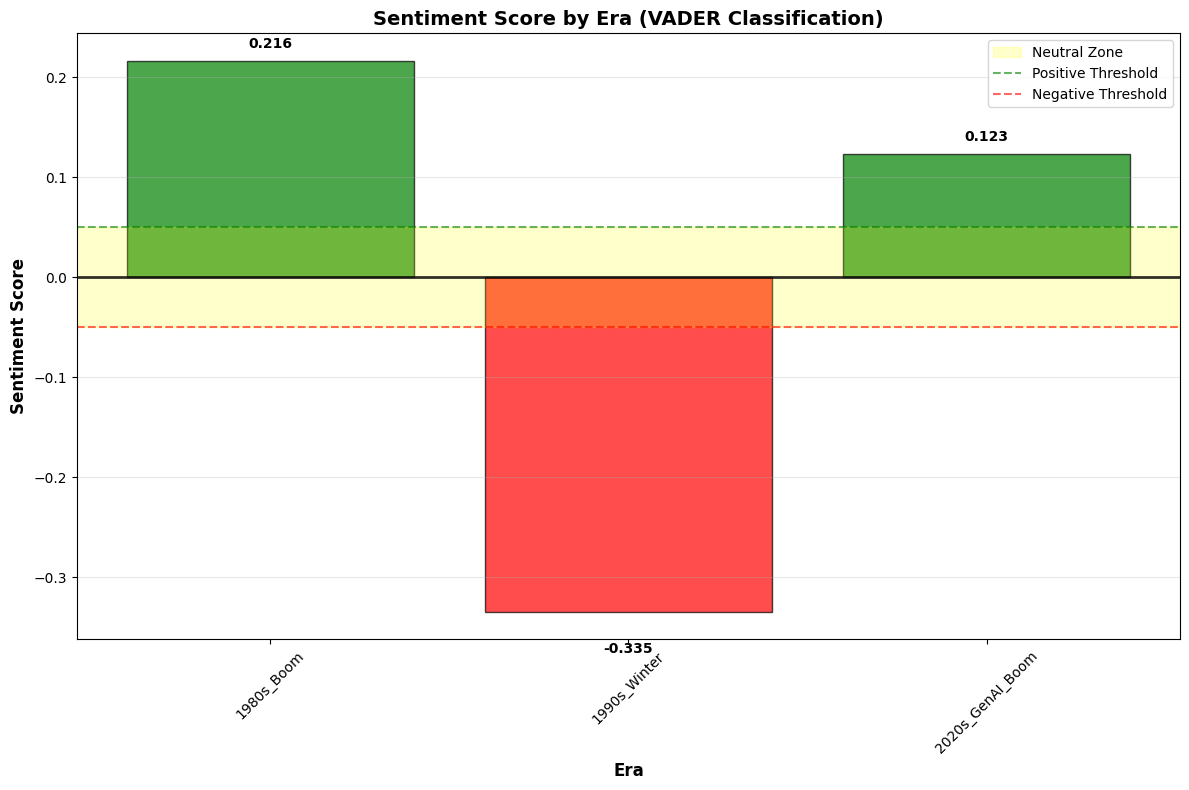

=== VADER Sentiment Classification ===
1980s_Boom: 0.216 → Positive
1990s_Winter: -0.335 → Negative
2020s_GenAI_Boom: 0.123 → Positive


In [ ]:
plt.figure(figsize=(12, 8))
x = era_sentiment.index.tolist()
y = era_sentiment.values.tolist()

# differentiate by the color
colors = []
for score in y:
    if score >= 0.05:
        colors.append('green')  # Positive
    elif score <= -0.05:
        colors.append('red')    # Negative
    else:
        colors.append('gray')   # Neutral

bars = plt.bar(x, y, color=colors, alpha=0.7, edgecolor='black')

# indicate the neutral zone
plt.axhspan(-0.05, 0.05, alpha=0.2, color='yellow', label='Neutral Zone')

# indicate the 0 line and the threshold
plt.axhline(y=0, color='black', linestyle='-', linewidth=2, alpha=0.8)
plt.axhline(y=0.05, color='green', linestyle='--', alpha=0.6, label='Positive Threshold')
plt.axhline(y=-0.05, color='red', linestyle='--', alpha=0.6, label='Negative Threshold')

for bar, value in zip(bars, y):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height >= 0 else -0.03),
             f'{value:.3f}', ha='center', va='bottom' if height >= 0 else 'top', 
             fontweight='bold', fontsize=10)

plt.xlabel('Era', fontsize=12, fontweight='bold')
plt.ylabel('Sentiment Score', fontsize=12, fontweight='bold')
plt.title('Sentiment Score by Era (VADER Classification)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("=== VADER Sentiment Classification ===")
for era, score in zip(x, y):
    if score >= 0.05:
        classification = "Positive"
    elif score <= -0.05:
        classification = "Negative"
    else:
        classification = "Neutral"
    print(f"{era}: {score:.3f} → {classification}")
